In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
duplicates=df.duplicated().any()
print(duplicates)

False


In [12]:
df.shape

(918, 12)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [14]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [15]:
print(df.describe())


              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [16]:
# encoding categorical variables using one hot encoding
data = pd.get_dummies(df, columns=['ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])



In [17]:
#checking if encoding done
data.head()

,Age,Sex,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,140,289,172,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
1,49,F,160,180,156,1.0,1,False,False,True,...,True,False,False,True,False,True,False,False,True,False
2,37,M,130,283,98,0.0,0,False,True,False,...,True,False,False,False,True,True,False,False,False,True
3,48,F,138,214,108,1.5,1,True,False,False,...,True,False,False,True,False,False,True,False,True,False
4,54,M,150,195,122,0.0,0,False,False,True,...,True,False,False,True,False,True,False,False,False,True


In [ ]:
# from now on we will use encoded data i.e, store in variable named "data"
#scaling (standarization)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
data[numerical_features] = scaler.fit_transform(data[numerical_features])




In [18]:
data.head()

,Age,Sex,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,140,289,172,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
1,49,F,160,180,156,1.0,1,False,False,True,...,True,False,False,True,False,True,False,False,True,False
2,37,M,130,283,98,0.0,0,False,True,False,...,True,False,False,False,True,True,False,False,False,True
3,48,F,138,214,108,1.5,1,True,False,False,...,True,False,False,True,False,False,True,False,True,False
4,54,M,150,195,122,0.0,0,False,False,True,...,True,False,False,True,False,True,False,False,False,True


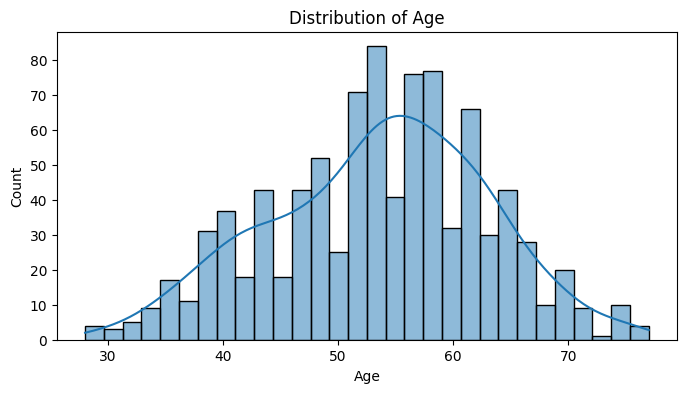

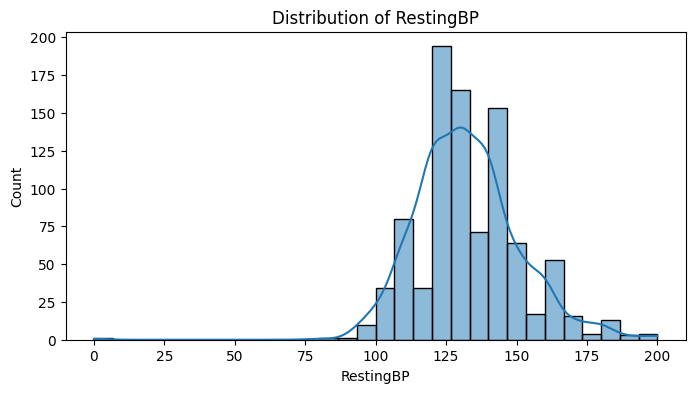

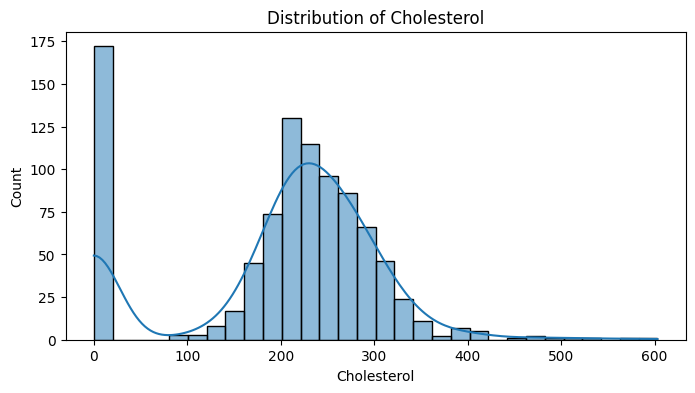

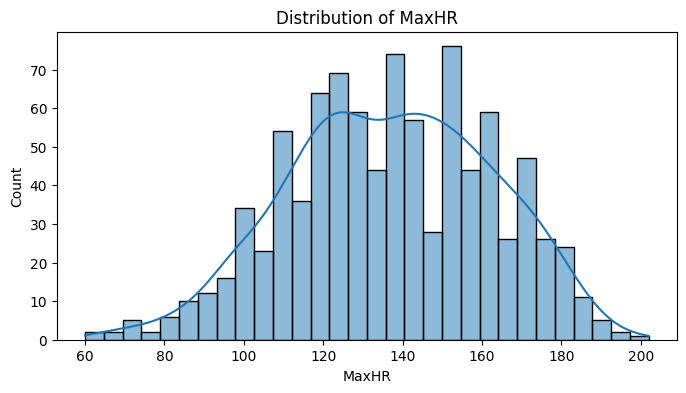

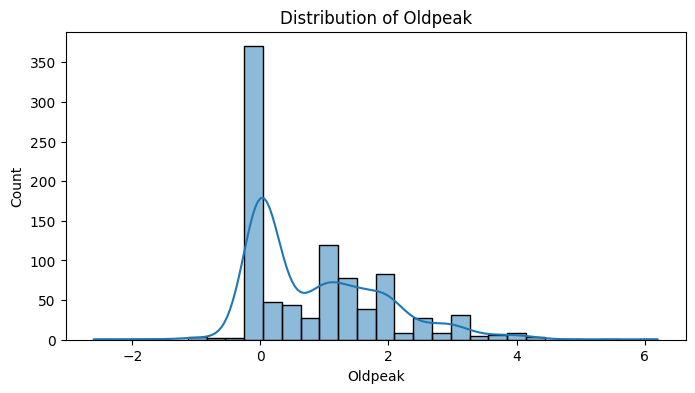

In [19]:

numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()


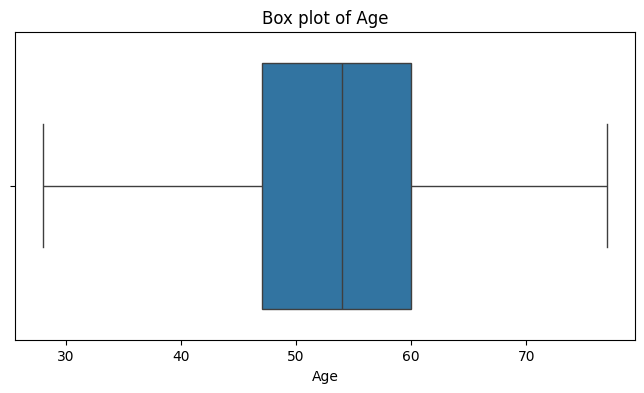

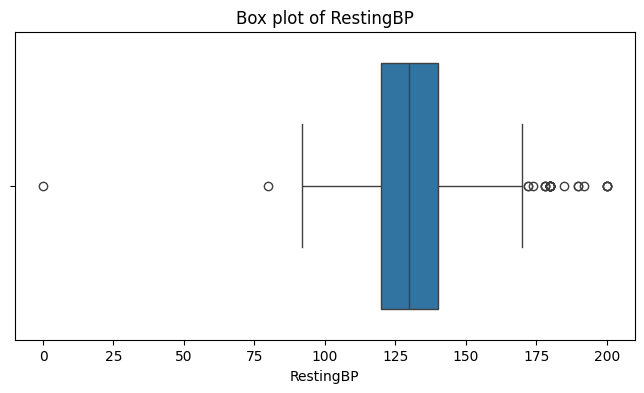

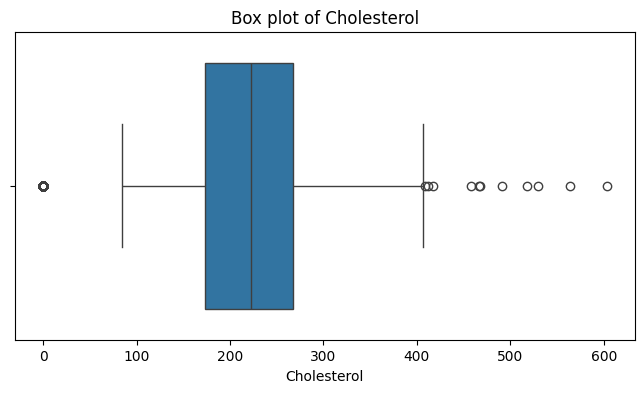

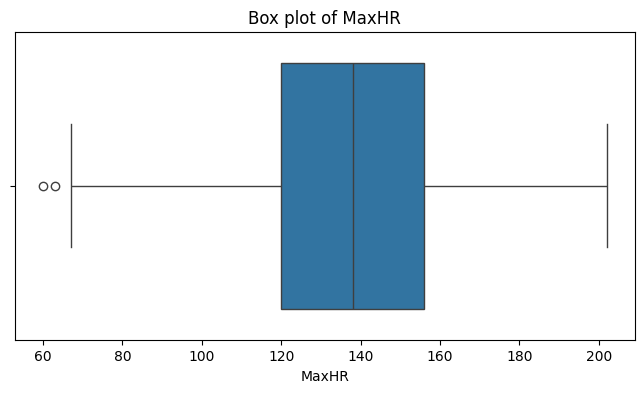

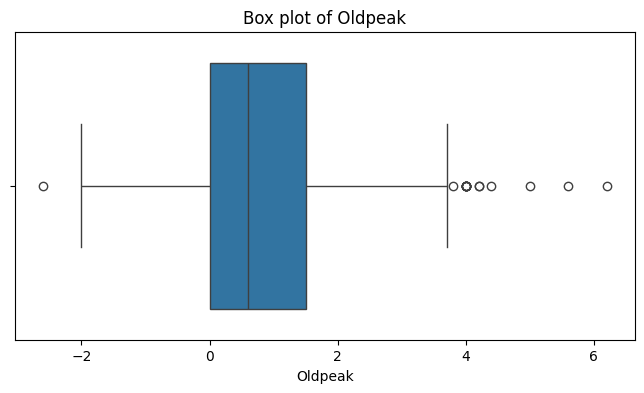

In [20]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=feature)
    plt.title(f'Box plot of {feature}')
    plt.show()


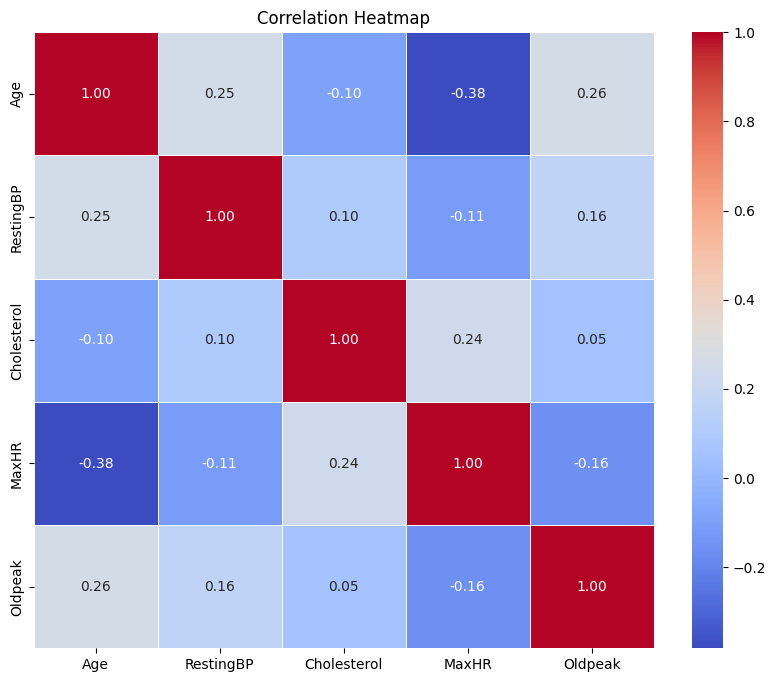

In [21]:
correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Handling Outliers using IQR**

In [22]:
#removing outliers of box plot
# Removing outliers based on IQR
Q1 = data['RestingBP'].quantile(0.25)
Q3 = data['RestingBP'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['RestingBP'] < (Q1 - 1.5 * IQR)) | (data['RestingBP'] > (Q3 + 1.5 * IQR)))]



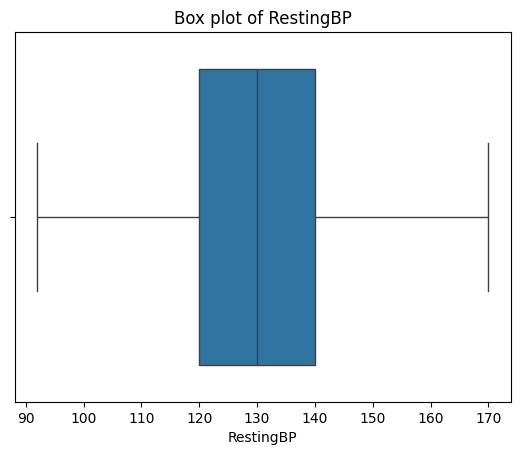

In [23]:
sns.boxplot(data=data, x='RestingBP')
plt.title('Box plot of RestingBP')
plt.show()

In [24]:
Q1 = data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['Cholesterol'] < (Q1 - 1.5 * IQR)) | (data['Cholesterol'] > (Q3 + 1.5 * IQR)))]


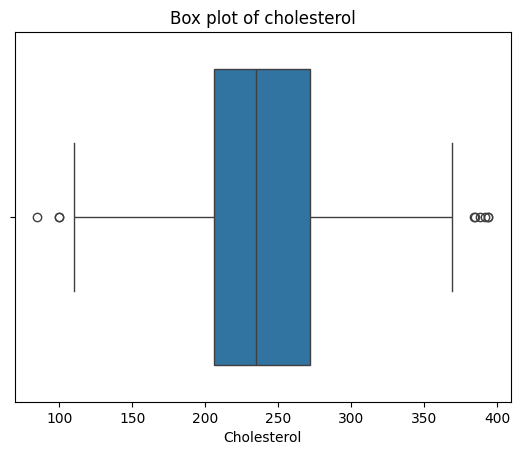

In [25]:
sns.boxplot(data=data, x='Cholesterol')
plt.title('Box plot of cholesterol')
plt.show()

In [26]:
# as ouliers of cholesterol not removed so trying again by using z score method
from scipy.stats import zscore
Q1 = data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_iqr = Q1 - 2 * IQR
upper_bound_iqr = Q3 + 2 * IQR

# Using Z-score method
z_scores = zscore(data['Cholesterol'])
abs_z_scores = np.abs(z_scores)

# Combining IQR and Z-score methods
data = data[(abs_z_scores < 3.5) &
            (data['Cholesterol'] > lower_bound_iqr) &
            (data['Cholesterol'] < upper_bound_iqr)]


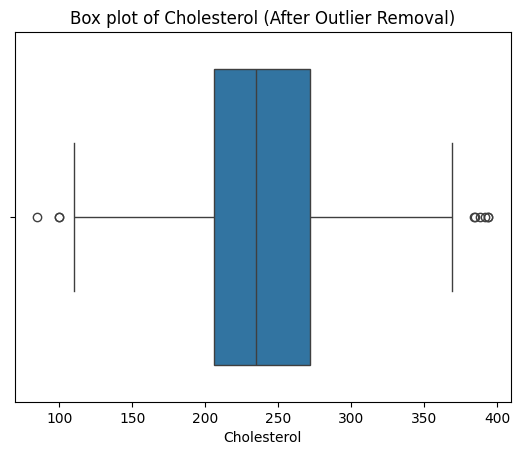

In [27]:
sns.boxplot(data=data, x='Cholesterol')
plt.title('Box plot of Cholesterol (After Outlier Removal)')
plt.show()

In [28]:
Q1 = data['MaxHR'].quantile(0.25)
Q3 = data['MaxHR'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['MaxHR'] < (Q1 - 1.5 * IQR)) | (data['MaxHR'] > (Q3 + 1.5 * IQR)))]


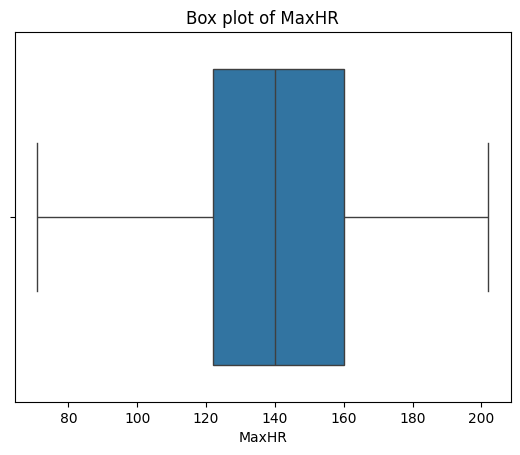

In [29]:
sns.boxplot(data=data, x='MaxHR')
plt.title('Box plot of MaxHR')
plt.show()

In [30]:
Q1 = data['Oldpeak'].quantile(0.25)
Q3 = data['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['Oldpeak'] < (Q1 - 1.5 * IQR)) | (data['Oldpeak'] > (Q3 + 1.5 * IQR)))]


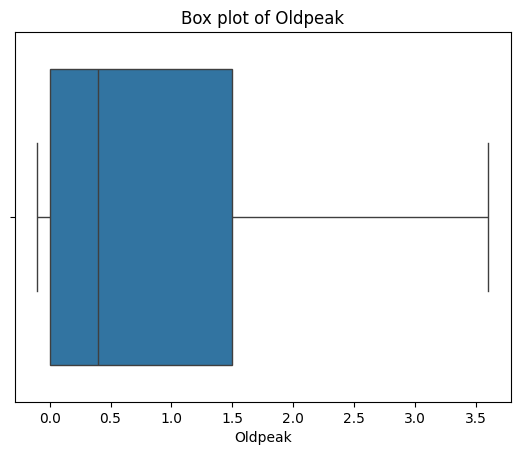

In [31]:
sns.boxplot(data=data, x='Oldpeak')
plt.title('Box plot of Oldpeak')
plt.show()

In [32]:
# DATA Splitting
X=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y_train

175    1
747    0
432    1
555    1
117    1
      ..
75     0
113    0
288    0
635    1
108    0
Name: HeartDisease, Length: 560, dtype: int64

In [36]:
data.head()

,Age,Sex,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,140,289,172,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
1,49,F,160,180,156,1.0,1,False,False,True,...,True,False,False,True,False,True,False,False,True,False
2,37,M,130,283,98,0.0,0,False,True,False,...,True,False,False,False,True,True,False,False,False,True
3,48,F,138,214,108,1.5,1,True,False,False,...,True,False,False,True,False,False,True,False,True,False
4,54,M,150,195,122,0.0,0,False,False,True,...,True,False,False,True,False,True,False,False,False,True


In [40]:
from sklearn.linear_model import LogisticRegression


In [42]:
log=LogisticRegression()
log.fit(X_train,y_train)

ValueError: could not convert string to float: 'M'